<a href="https://colab.research.google.com/github/vandrearczyk/isc-summer-school/blob/main/example_deepface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=eed86ad8c08ce225670d3487c85202933381d64fb0dc594ea3be03f2485a9afd
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [43]:
from deepface import DeepFace
from PIL import Image, ImageDraw
import requests
import numpy as np
import matplotlib.pyplot as plt

Load images from URLs

In [20]:
url1 = "https://media.licdn.com/dms/image/D4E03AQG6L0xtF9DFIA/profile-displayphoto-shrink_200_200/0/1697533028637?e=2147483647&v=beta&t=XM0yh5ng5PEzhMSdJkVMkQ3tP9MmC63wP5CP1hqFXZg"
url2 = "https://d35r1ltz73o8oz.cloudfront.net/portal/rushes/w6Cg7mwy8Y6VzbEQPFGh8G/snapshots/snapshot0_original.jpg"
url3 = "https://walliser-zeitung.ch/wp-content/uploads/2023/04/Bildschirmfoto-vom-2023-04-04-05-43-01.png"

im1 = Image.open(requests.get(url1, stream=True).raw)
im2 = Image.open(requests.get(url2, stream=True).raw)
im3 = Image.open(requests.get(url3, stream=True).raw)



Plot images

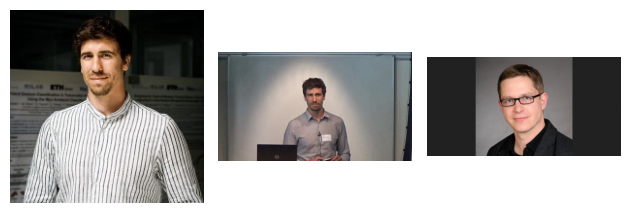

In [22]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 3)

axs[0].imshow(im1)
axs[0].axis('off')

axs[1].imshow(im2)
axs[1].axis('off')

axs[2].imshow(im3)
axs[2].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Run deepface to identify using a ref image and 2 test images

In [16]:
verification = DeepFace.verify(np.array(im1),np.array(im2), model_name = 'Facenet')
print(verification)


{'verified': True, 'distance': 0.17070271995688713, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 62, 'y': 26, 'w': 57, 'h': 57, 'left_eye': None, 'right_eye': None}, 'img2': {'x': 556, 'y': 223, 'w': 160, 'h': 160, 'left_eye': (656, 283), 'right_eye': (608, 286)}}, 'time': 1.31}


In [23]:
verification = DeepFace.verify(np.array(im1),np.array(im3), model_name = 'Facenet')
print(verification)

{'verified': False, 'distance': 1.1286774799967938, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 62, 'y': 26, 'w': 57, 'h': 57, 'left_eye': None, 'right_eye': None}, 'img2': {'x': 491, 'y': 179, 'w': 390, 'h': 390, 'left_eye': (741, 310), 'right_eye': (607, 331)}}, 'time': 2.04}


Analyze the face (age, gender, emotion ...)

In [31]:
analysis = DeepFace.analyze(np.array(im1), actions = ["age", "gender", "emotion", "race"])
print(f"\nx{analysis[0]['age']}, {analysis[0]['dominant_gender']}, {analysis[0]['dominant_emotion']}, {analysis[0]['dominant_race']}")


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]


27, Man, neutral, middle eastern


Detect and count faces can also be done with functions wrapped in deepface (also yolo if installed)

Number of faces detected: 5


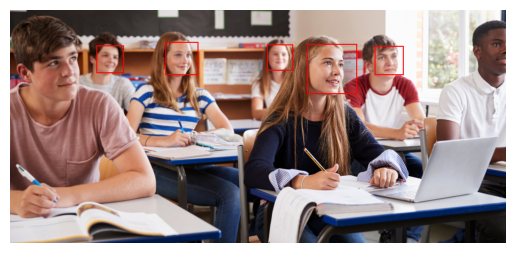

In [49]:
import cv2

url4 = "https://pro.etudiant.lefigaro.fr/wp-content/uploads/2023/02/TAILLE-ARTICLE-3.png"

im4 = Image.open(requests.get(url4, stream=True).raw)

# Convert PIL image to a NumPy array for OpenCV compatibility
im4_np = np.array(im4)

# Detect faces using DeepFace (this internally uses OpenCV)
detected_faces = DeepFace.extract_faces(im4_np, detector_backend='opencv', enforce_detection=False)

# Convert the image to grayscale for face detection
gray = cv2.cvtColor(im4_np, cv2.COLOR_RGB2GRAY)

# Load the face detection model (Haar Cascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Count the number of faces
number_of_faces = len(faces)
print(f"Number of faces detected: {number_of_faces}")

# Draw rectangles around detected faces on the original PIL image
draw = ImageDraw.Draw(im4)
for (x, y, w, h) in faces:
    draw.rectangle([x, y, x+w, y+h], outline="red", width=2)

# Display the image with detected faces using Matplotlib
plt.imshow(im4)
plt.axis('off')
plt.show()

Real time video analysis -> try it out on your machine.

In [ ]:
# Real time video analysis
# db_path = "/home/vincent/repos/isc-data-processing-visualization/data/person_recognition/database_folders_s"

# DeepFace.stream(db_path = db_path)